<a href="https://colab.research.google.com/github/rsgis2025pranjali-hub/python-basics/blob/main/notebooks/04_Mini_Remote_Sensing_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4 — Mini Remote Sensing Task with NetCDF & xarray

In this notebook, you will connect Python to a **typical remote sensing / model data format**:  
the **NetCDF** file.

You will use:

- **xarray** → to open and inspect NetCDF files  
- **NumPy** → to compute simple statistics  
- **Matplotlib** → to make basic plots  

This is a *template-style* notebook: it shows you the workflow you can apply to any NetCDF file
containing gridded data such as **SST, chlorophyll, SSH, AOD, or model output**.


## 0. What is NetCDF? What is xarray?

### NetCDF (Network Common Data Form)
- A file format designed for **scientific data**  
- Stores variables (e.g. `sst`, `chl`, `ssh`) with dimensions (e.g. `time`, `lat`, `lon`)  
- Includes **metadata**: units, long_name, coordinates, etc.  
- Used widely in:
  - Satellite products (e.g. SST, chlorophyll)  
  - Reanalysis (ERA5, MERRA)  
  - Ocean/Atmosphere models (NEMO, HYCOM, GOTM, WRF)  

### xarray
- A Python library that makes NetCDF feel like working with **labelled arrays**  
- Adds names to dimensions (`time`, `lat`, `lon`)  
- Easy selection: `ds.sst.sel(time='2020-01-01')`  
- Built to work nicely with **NetCDF** files.

In this notebook we assume you have (or will later add) a small NetCDF file.


## 1. Import Required Libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Opening a NetCDF Dataset with xarray

We will use `xr.open_dataset()` to open a NetCDF file.  
Update the file path according to your data.


In [ ]:
from genericpath import exists
# TODO: change this path to your actual NetCDF file path.
import xarray as xr
import requests, os
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/EarthSystem-Science-Lab/python-basics/main/data/data_sst.nc"  # change this
local = "data_sst.nc"

if not os.path.exists(local):
  r = requests.get(url)
  with open(local, 'wb') as f:
    f.write(r.content)

ds = xr.open_dataset(local)
ds



<xarray.Dataset> Size: 7kB
Dimensions:  (time: 7, lat: 11, lon: 11)
Coordinates:
  * time     (time) datetime64[ns] 56B 2020-01-01 2020-01-02 ... 2020-01-07
  * lat      (lat) float64 88B 10.0 11.0 12.0 13.0 14.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 88B 70.0 71.0 72.0 73.0 74.0 ... 77.0 78.0 79.0 80.0
Data variables:
    sst      (time, lat, lon) float64 7kB ...
Attributes:
    title:    Sample synthetic SST dataset for teaching
    source:   Generated in Python for teaching by Arjun's EarthSystem-Science...
    history:  Created as a small example NetCDF file for Notebook 4

## 3. Exploring the Dataset Structure

In [ ]:
# After defining ds, you can run:

ds               # dataset summary
ds.dims          # dimensions
ds.data_vars     # variables
ds.attrs         # global attributes


{'title': 'Sample synthetic SST dataset for teaching',
 'source': "Generated in Python for teaching by Arjun's EarthSystem-Science-Lab",
 'history': 'Created as a small example NetCDF file for Notebook 4'}

## 4. Selecting the Main Variable

In [ ]:
# TODO: replace 'sst' with your variable name.

var = ds['sst']
print(var)
print(var.attrs)


<xarray.DataArray 'sst' (time: 7, lat: 11, lon: 11)> Size: 7kB
array([[[26.  , 26.02, ..., 26.18, 26.2 ],
        [26.1 , 26.12, ..., 26.28, 26.3 ],
        ...,
        [26.9 , 26.92, ..., 27.08, 27.1 ],
        [27.  , 27.02, ..., 27.18, 27.2 ]],

       [[26.2 , 26.22, ..., 26.38, 26.4 ],
        [26.3 , 26.32, ..., 26.48, 26.5 ],
        ...,
        [27.1 , 27.12, ..., 27.28, 27.3 ],
        [27.2 , 27.22, ..., 27.38, 27.4 ]],

       ...,

       [[27.  , 27.02, ..., 27.18, 27.2 ],
        [27.1 , 27.12, ..., 27.28, 27.3 ],
        ...,
        [27.9 , 27.92, ..., 28.08, 28.1 ],
        [28.  , 28.02, ..., 28.18, 28.2 ]],

       [[27.2 , 27.22, ..., 27.38, 27.4 ],
        [27.3 , 27.32, ..., 27.48, 27.5 ],
        ...,
        [28.1 , 28.12, ..., 28.28, 28.3 ],
        [28.2 , 28.22, ..., 28.38, 28.4 ]]])
Coordinates:
  * time     (time) datetime64[ns] 56B 2020-01-01 2020-01-02 ... 2020-01-07
  * lat      (lat) float64 88B 10.0 11.0 12.0 13.0 14.0 ... 17.0 18.0 19.0 20.0
  * lon

## 5. Basic Statistics on the Variable

In [ ]:
# TODO: uncomment when var is defined.

global_mean = float(var.mean())
global_min = float(var.min())
global_max = float(var.max())

print("Global mean:", global_mean)
print("Global min:", global_min)
print("Global max:", global_max)


Global mean: 27.20000000000001
Global min: 26.0
Global max: 28.4


## 6. Plotting a Time-Mean Map

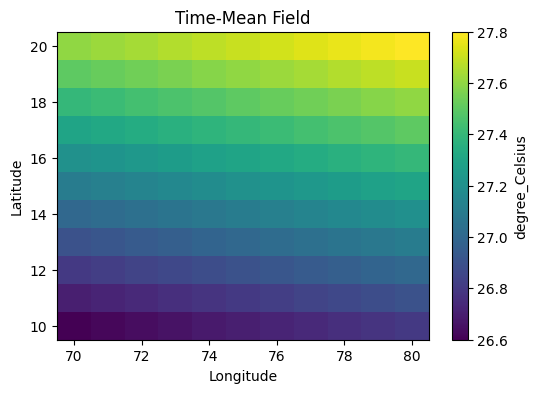

In [ ]:
# TODO: adapt coordinate names to your dataset.

var_mean_time = var.mean(dim='time')

plt.figure(figsize=(6,4))
plt.pcolormesh(ds['lon'], ds['lat'], var_mean_time, shading='auto')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Time-Mean Field')
cbar = plt.colorbar()
cbar.set_label(var.attrs.get('units', ''))
plt.show()


## 7. Plotting a Time Series at One Location

In [ ]:
# TODO: choose a point near your study region.

lat_pt = 15.5
lon_pt = 73.8

ts = var.sel(lat=lat_pt, lon=lon_pt, method='nearest')

plt.figure()
ts.plot()
plt.title(f"Time series at lat={lat_pt}, lon={lon_pt}")
plt.show()


## 8. Reflection — xarray & NetCDF Workflow
Write your reflections and interpretation here.

In 2025, using xarray and NetCDF makes working with satellite data way easier than it used to be. Here is my take on how this process works:
Labels are better than numbers: Instead of trying to remember which column is "Latitude" or which row is "Time," xarray lets me just call them by name. It feels more like reading a map than doing hard math.
It’s "Smart" data: Because NetCDF files have all the info (like units and dates) built right in, I don’t have to keep a separate manual open. The file tells the computer what it is, which saves a lot of time.
Doesn't crash my computer: Even if a file is huge, xarray doesn't try to open the whole thing at once. It only "grabs" the specific part I want to plot, which keeps everything running smoothly.
Handles the "Gaps": Real satellite data often has missing spots (like when a cloud blocks the view). This workflow is great because it automatically ignores those empty spots when calculating averages, so my results don't get messed up.